In [1]:
import numpy as np
import matplotlib.pyplot as plt


try:
    import mplhep as hep
    hep.style.use("LHCb2")
except:
    print("mplhep not found. Falling back to default plot style")



In [2]:
# solutionsFile = './solution_FO.csv'
solutionsFile = './solution_Coann.csv'

In [3]:
data = np.genfromtxt(solutionsFile,delimiter=',',names=True)
omTot = 0.0
ylabels = []
for label in data.dtype.names:
    if label == 'x':
        continue
    if label[0] != 'Y':
        continue
    ylabels.append(label)
    omh2 = 0.12*(data[label][-1])/(6.8e-13)
    print(f'Omega*h^2 ({label}) = {omh2:1.4g}')
    omTot += omh2
print(f'Omega*h^2 = {omTot:1.4g}')

Omega*h^2 (Yb1) = 3.234e-21
Omega*h^2 (Yxd) = 0.7086
Omega*h^2 = 0.7086


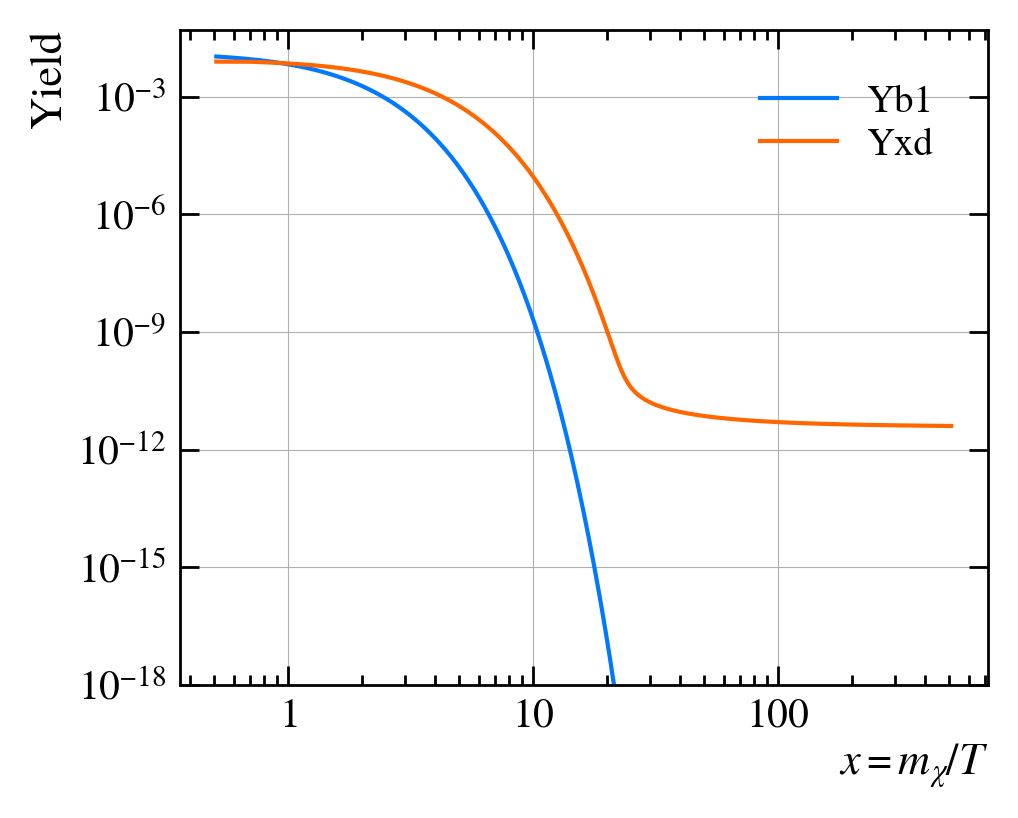

In [4]:
fig = plt.figure(figsize=(10,8))
for label in ylabels:
    plt.plot(data['x'],data[label], linewidth=3, label = label)

plt.xlabel(r'$x = m_{\chi}/T$')
plt.ylabel('Yield')

plt.ylim(1e-18,5e-2)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

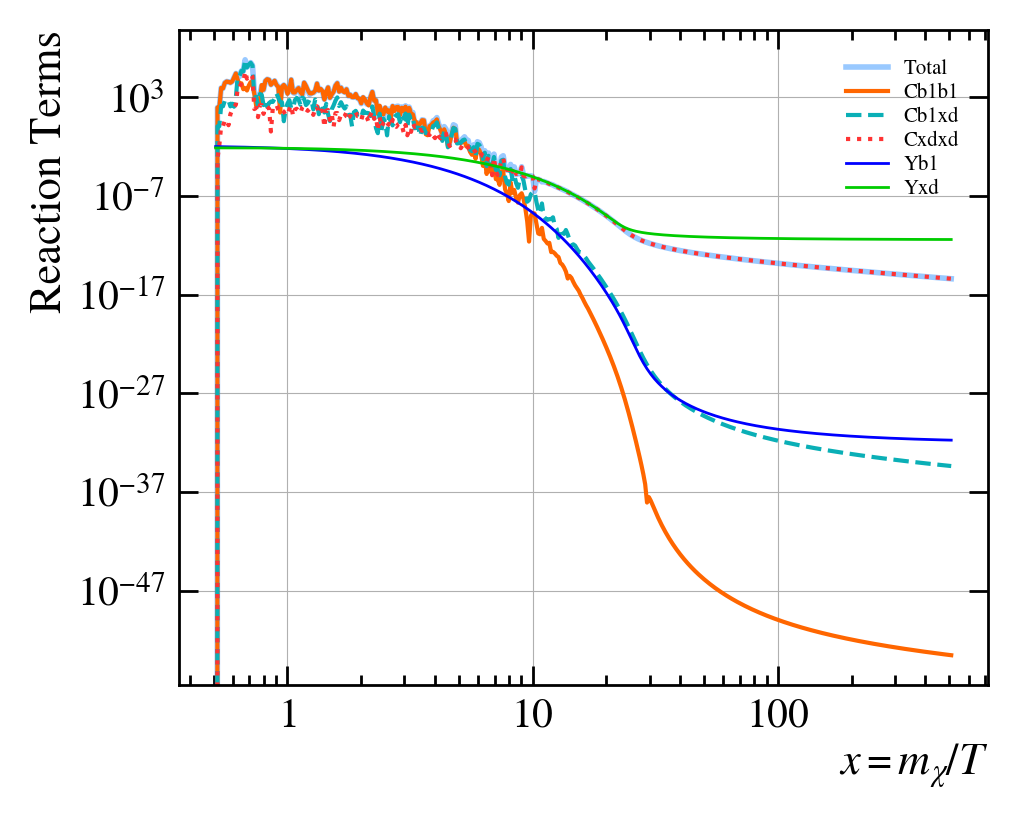

In [21]:
fig = plt.figure(figsize=(10,8))
reaction_labels = [label for label in data.dtype.names if (label[0] != 'Y' and label != 'x')]
total_rate = np.abs(data[reaction_labels[0]])
cb1b1_rate = np.zeros(len(data))
cxdxd_rate = np.zeros(len(data))
cb1xd_rate = np.zeros(len(data))
db1 = data['Db1dsdxH']
dxd = data['DxddsdxH']
for label in reaction_labels[1:]:
    total_rate += data[label]
    if label.split('_')[0].count('b1') == 2:
        cb1b1_rate += data[label]
    elif label.split('_')[0].count('xd') == 2:
        cxdxd_rate += data[label]
    else:
        cb1xd_rate += data[label]


plt.plot(data['x'],np.abs(total_rate), linewidth=4, label = 'Total', linestyle='solid',alpha=0.4)
plt.plot(data['x'],np.abs(cb1b1_rate), linewidth=3, label = 'Cb1b1', linestyle='solid')
plt.plot(data['x'],np.abs(cb1xd_rate), linewidth=3, label = 'Cb1xd', linestyle='dashed')
plt.plot(data['x'],np.abs(cxdxd_rate), linewidth=3, label = 'Cxdxd', linestyle='dotted')

for label in ylabels:
    plt.plot(data['x'],data[label], linewidth=2, label = label)



plt.xlabel(r'$x = m_{\chi}/T$')
plt.ylabel('Reaction Terms')

# plt.ylim(1e-2*total_rate.min(),100*total_rate.max())
# plt.ylim(1e-5,1e5)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend(fontsize=15)
plt.show()